# PREPROCESSING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

* 1 = Real
* 0 = False

In [3]:
data=pd.read_csv('archive/data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


I can see we have some null values, let's investigate

In [5]:
print("Null values in the dataset:\n",data[data.columns].isnull().sum())

Null values in the dataset:
 id           0
title      558
author    1957
text        39
label        0
dtype: int64


text and title are very important so i will drop the lines with null values on these columns 

In [6]:
data.dropna(subset={'title','text'},inplace=True)

Since i don't want to lose a large percentage of our data set i will replace the null values on the 'authors' column.

In [7]:
data['author'].fillna("Unknown author", inplace = True)

I have eliminated all null values.

Let's check for NaN values.

In [8]:
data[data.columns].isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

No NaN values 

Great :)

*
*


Further investigation

In [9]:
data.describe() ## this didn't help

,id,label
count,20203.000000,20203.000000
mean,10400.135871,0.485868
std,6001.740822,0.499813
min,0.000000,0.000000
25%,5208.500000,0.000000
50%,10405.000000,0.000000
75%,15588.500000,1.000000
max,20799.000000,1.000000


In [10]:
data['label'].value_counts()

label
0    10387
1     9816
Name: count, dtype: int64

In [11]:
authors=data['author'].unique()

In [12]:
for x in authors:
    print(x)

Darrell Lucus
Daniel J. Flynn
Consortiumnews.com
Jessica Purkiss
Howard Portnoy
Daniel Nussbaum
Unknown author
Alissa J. Rubin
Megan Twohey and Scott Shane
Aaron Klein
Chris Tomlinson
Amando Flavio
Jason Ditz
AnotherAnnie
Jack Williams
Michael Corkery and Stacy Cowley
Starkman
The Doc
Jeff Poor
Jerome Hudson
Pam Key
Donald G. McNeil Jr. and Pam Belluck
Ira Helfand
Aaron Klein and Ali Waked
Amanda Shea
Jim Dwyer
Mark Landler
Ian Hanchett
Steven Erlanger
Clifford Krauss
Leslie Picker, Danny Hakim and Michael J. de la Merced
Andrew Higgins
greanfinisher .
b
AWR Hawkins
Aaron E. Carroll
Dr. Susan Berry
Alexandria Laredo
Katie Rogers
Ian Mason
Jim Rutenberg, Ben Protess and Emily Steel
Gordon Duff, Senior Editor
Brian X. Chen
Virginia Hale
Lance Schuttler
Nate Church
Madeline
M.R. Islam
Jeff Gordinier
Neil Irwin
Anonymous Coward (UID 12781064)
Kenneth Chang and Sewell Chan
Truth Broadcast Network
A. O. Scott
Kristina Wong
Admin
Jeremy W. Peters
Jason Easley
Chris Black
Ivan the Stakhanovets

## Visualization 

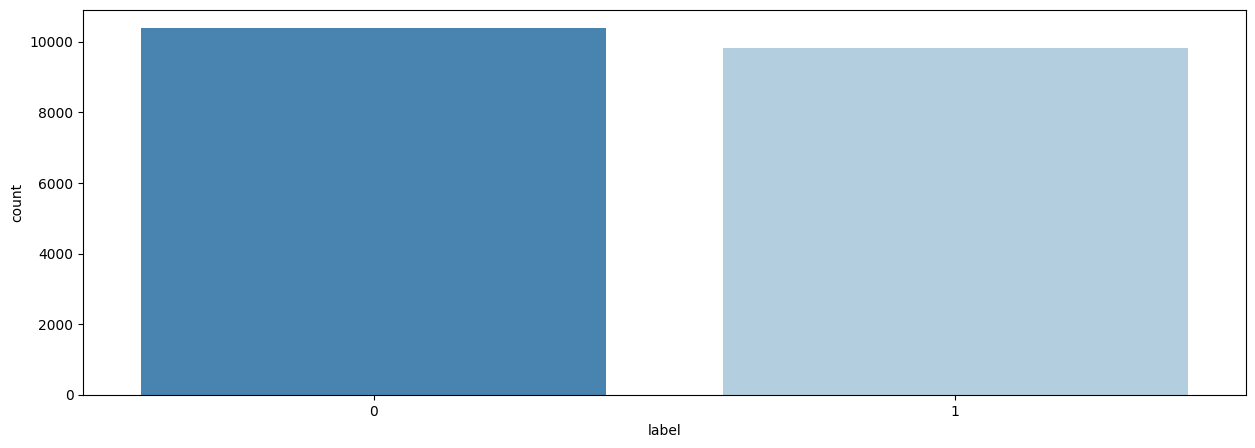

In [79]:
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=data,palette='Blues_r')
plt.savefig('visualization')
plt.show()

# Lower case transformation and number removal

In [14]:
data['text']=data['text'].str.lower()

In [15]:
import re

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

In [16]:
data['text']=data['text'].apply(remove_numbers)

In [17]:
data['text'].head(1)

0    house dem aide: we didn’t even see comey’s let...
Name: text, dtype: object

*

* (Left empty on purpose)

*


# Sentence Segmentation and Tokenization

In [18]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/orestiszoumpoulakis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
%%time
segmented_sent = [sent_tokenize(row) for row in data['text']]
data['text_segm']=segmented_sent

CPU times: user 8.16 s, sys: 37.9 ms, total: 8.2 s
Wall time: 8.22 s


In [20]:
# I wanna be able to see all of the text so 
pd.set_option('display.max_colwidth', None)

In [21]:
data['text_segm'].head(1)

0    [house dem aide: we didn’t even see comey’s letter until jason chaffetz tweeted it by darrell lucus on october ,  subscribe jason chaffetz on the stump in american fork, utah ( image courtesy michael jolley, available under a creative commons-by license) \nwith apologies to keith olbermann, there is no doubt who the worst person in the world is this week–fbi director james comey., but according to a house democratic aide, it looks like we also know who the second-worst person is as well., it turns out that when comey sent his now-infamous letter announcing that the fbi was looking into emails that may be related to hillary clinton’s email server, the ranking democrats on the relevant committees didn’t hear about it from comey., they found out via a tweet from one of the republican committee chairmen., as we now know, comey notified the republican chairmen and democratic ranking members of the house intelligence, judiciary, and oversight committees that his agency was reviewing ema

## Sentence segmentation done

*

* (Left empty in purpose)

*

In [22]:
%%time

tokenized_words = [
    [word_tokenize(sentence) for sentence in sentences]
    for sentences in segmented_sent]

CPU times: user 52 s, sys: 231 ms, total: 52.2 s
Wall time: 52.3 s


In [23]:
data['text_token']=tokenized_words

In [24]:
data['text_token'].head(1)

0    [[house, dem, aide, :, we, didn, ’, t, even, see, comey, ’, s, letter, until, jason, chaffetz, tweeted, it, by, darrell, lucus, on, october, ,, subscribe, jason, chaffetz, on, the, stump, in, american, fork, ,, utah, (, image, courtesy, michael, jolley, ,, available, under, a, creative, commons-by, license, ), with, apologies, to, keith, olbermann, ,, there, is, no, doubt, who, the, worst, person, in, the, world, is, this, week–fbi, director, james, comey, .], [but, according, to, a, house, democratic, aide, ,, it, looks, like, we, also, know, who, the, second-worst, person, is, as, well, .], [it, turns, out, that, when, comey, sent, his, now-infamous, letter, announcing, that, the, fbi, was, looking, into, emails, that, may, be, related, to, hillary, clinton, ’, s, email, server, ,, the, ranking, democrats, on, the, relevant, committees, didn, ’, t, hear, about, it, from, comey, .], [they, found, out, via, a, tweet, from, one, of, the, republican, committee, chairmen, .], [as, we

## Tokenization done 

*

* (Left empty in purpose)

*

# Stopwords removal

In [25]:
from nltk.corpus import stopwords

#nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [26]:
def remove_stopwords(word_list):
    filtered_words = [word for word in word_list if word.lower() not in stop_words]
    return filtered_words

In [27]:
data['text_stopwords_removed'] = data['text_token'].apply(lambda x: [remove_stopwords(words) for words in x])

In [28]:
data['text_stopwords_removed'].head(1)

0    [[house, dem, aide, :, ’, even, see, comey, ’, letter, jason, chaffetz, tweeted, darrell, lucus, october, ,, subscribe, jason, chaffetz, stump, american, fork, ,, utah, (, image, courtesy, michael, jolley, ,, available, creative, commons-by, license, ), apologies, keith, olbermann, ,, doubt, worst, person, world, week–fbi, director, james, comey, .], [according, house, democratic, aide, ,, looks, like, also, know, second-worst, person, well, .], [turns, comey, sent, now-infamous, letter, announcing, fbi, looking, emails, may, related, hillary, clinton, ’, email, server, ,, ranking, democrats, relevant, committees, ’, hear, comey, .], [found, via, tweet, one, republican, committee, chairmen, .], [know, ,, comey, notified, republican, chairmen, democratic, ranking, members, house, intelligence, ,, judiciary, ,, oversight, committees, agency, reviewing, emails, recently, discovered, order, see, contained, classified, information, .], [long, letter, went, ,, oversight, committee, chai

## Stopwords removed

*

* (Left empty in purpose)

*

On my last attmept i tried word stemming, in this attempt i will try word lemmatization  (a technique that reduces the word to its lemma ( root ) instead of only removing the  prefixes or suffixes)

## POS Tagging (Part Of Speech)

Aiming to make word lemmatization and stemming more accurate

In [29]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/orestiszoumpoulakis/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [30]:
def pos_tagging(words):
    return pos_tag(words)

In [31]:
%%time
data['pos_tags'] =  data['text_stopwords_removed'].apply(lambda x: [pos_tagging(words) for words in x])

CPU times: user 4min 44s, sys: 4.19 s, total: 4min 48s
Wall time: 1h 10min 51s


In [32]:
data['pos_tags'].head(2)

0    [[(house, NN), (dem, JJ), (aide, NN), (:, :), (’, JJ), (even, RB), (see, VBP), (comey, JJ), (’, NNP), (letter, NN), (jason, NN), (chaffetz, NN), (tweeted, VBD), (darrell, JJ), (lucus, IN), (october, NN), (,, ,), (subscribe, JJ), (jason, NN), (chaffetz, NN), (stump, JJ), (american, JJ), (fork, NN), (,, ,), (utah, NN), ((, (), (image, NN), (courtesy, NN), (michael, NN), (jolley, NN), (,, ,), (available, JJ), (creative, JJ), (commons-by, JJ), (license, NN), (), )), (apologies, VBZ), (keith, JJ), (olbermann, NN), (,, ,), (doubt, NN), (worst, JJS), (person, NN), (world, NN), (week–fbi, NN), (director, NN), (james, NNS), (comey, VBP), (., .)], [(according, VBG), (house, NN), (democratic, JJ), (aide, NN), (,, ,), (looks, VBZ), (like, IN), (also, RB), (know, VBP), (second-worst, JJ), (person, NN), (well, RB), (., .)], [(turns, NNS), (comey, JJ), (sent, VBD), (now-infamous, JJ), (letter, NN), (announcing, VBG), (fbi, NN), (looking, VBG), (emails, NNS), (may, MD), (related, VB), (hillary, J

## NLTK TO WORDNET (it is needed for the lemmatization)

From ChatGPT

"The reason for converting NLTK POS tags to WordNet POS tags is that the two libraries use slightly different tag sets. NLTK uses its own POS tag set, and WordNet, which is often used for lemmatization, uses a different set of POS tags.

NLTK POS tags include categories like 'NN' (noun), 'VB' (verb), 'JJ' (adjective), and 'RB' (adverb), among others. On the other hand, WordNet POS tags use 'n' for nouns, 'v' for verbs, 'a' for adjectives, and 'r' for adverbs.

For lemmatization to be effective, it's important to provide the correct POS tag to the lemmatizer because the same word may have different lemmas based on its POS. For example, the word "running" could be a noun (as in "a morning run") or a verb (as in "I am running"), and the lemmatized form would be different in each case."

In [33]:
def nltk_to_wordnet_pos(nltk_pos):
    if nltk_pos.startswith('J'):
        return wordnet.ADJ
    elif nltk_pos.startswith('V'):
        return wordnet.VERB
    elif nltk_pos.startswith('N'):
        return wordnet.NOUN
    elif nltk_pos.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Word lemmatization

In [34]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/orestiszoumpoulakis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/orestiszoumpoulakis/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [35]:
def lemmatize(word, nltk_pos):
    lemmatizer = WordNetLemmatizer()
    wordnet_pos = nltk_to_wordnet_pos(nltk_pos)
    return lemmatizer.lemmatize(word, pos=wordnet_pos)

In [36]:
%%time
data['text_lemmatized'] = data['pos_tags'].apply(lambda x: [[lemmatize(word, pos) for word, pos in words] for words in x])

CPU times: user 24.8 s, sys: 1.86 s, total: 26.7 s
Wall time: 27.2 s


In [37]:
data['text_lemmatized'].head(2)

0    [[house, dem, aide, :, ’, even, see, comey, ’, letter, jason, chaffetz, tweet, darrell, lucus, october, ,, subscribe, jason, chaffetz, stump, american, fork, ,, utah, (, image, courtesy, michael, jolley, ,, available, creative, commons-by, license, ), apologies, keith, olbermann, ,, doubt, bad, person, world, week–fbi, director, james, comey, .], [accord, house, democratic, aide, ,, look, like, also, know, second-worst, person, well, .], [turn, comey, send, now-infamous, letter, announce, fbi, look, email, may, relate, hillary, clinton, ’, email, server, ,, rank, democrat, relevant, committee, ’, hear, comey, .], [find, via, tweet, one, republican, committee, chairman, .], [know, ,, comey, notify, republican, chairman, democratic, rank, member, house, intelligence, ,, judiciary, ,, oversight, committee, agency, review, email, recently, discover, order, see, contain, classified, information, .], [long, letter, go, ,, oversight, committee, chairman, jason, chaffetz, set, political, 

## WORD STEMMING

In [38]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
data['text_stemmed'] = data['text_lemmatized'].apply(lambda x: [[ps.stem(word) for word in words] for words in x])

In [39]:
data['text_stemmed'].head(2)

0    [[hous, dem, aid, :, ’, even, see, comey, ’, letter, jason, chaffetz, tweet, darrel, lucu, octob, ,, subscrib, jason, chaffetz, stump, american, fork, ,, utah, (, imag, courtesi, michael, jolley, ,, avail, creativ, commons-bi, licens, ), apolog, keith, olbermann, ,, doubt, bad, person, world, week–fbi, director, jame, comey, .], [accord, hous, democrat, aid, ,, look, like, also, know, second-worst, person, well, .], [turn, comey, send, now-infam, letter, announc, fbi, look, email, may, relat, hillari, clinton, ’, email, server, ,, rank, democrat, relev, committe, ’, hear, comey, .], [find, via, tweet, one, republican, committe, chairman, .], [know, ,, comey, notifi, republican, chairman, democrat, rank, member, hous, intellig, ,, judiciari, ,, oversight, committe, agenc, review, email, recent, discov, order, see, contain, classifi, inform, .], [long, letter, go, ,, oversight, committe, chairman, jason, chaffetz, set, polit, world, ablaz, tweet, .], [fbi, dir, inform, ,, ``, fbi, l

## Feature extraction

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

def identity_tokenizer(text):
    return text
data['text_stemmed'] = data['text_stemmed'].apply(lambda x: ' '.join(map(str, x)))
vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False)
X_f = vectorizer.fit_transform(data['text_stemmed'])

feature_names = vectorizer.get_feature_names_out()

In [41]:
X_f.shape

(20203, 990)

In [42]:
data['label'].shape

(20203,)

# TRAIN - TEST SPLIT

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = X_f
y = data['label']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16162, 990)
(16162,)
(4041, 990)
(4041,)


*

* (Left empty in purpose)

*

# 2.0 CLASSIFICATION

## 2.1 Logistic Regression 

In [47]:
from sklearn.linear_model import LogisticRegression


clf_LR = LogisticRegression(random_state=42)
clf_LR.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
yhat_test_1 = clf_LR.predict(X_test)

In [50]:
accuracy_1 = accuracy_score(y_test, yhat_test_1)
print(accuracy_1)

0.8403860430586488


In [51]:
clf_LR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

###  2.1.1 Grid Search (Hyperparameter tuning)

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [82]:
%%time 
ThisIsAPipe  = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', LogisticRegression())
])

param_grid_LR = [{
        'classifier__solver': ['lbfgs'],
        'classifier__C': [0.001, 0.01, 0.1, 1, 5],
        'classifier__penalty': [None, 'l2']
    },

    {
        'classifier__solver': ['liblinear', 'saga'],
        'classifier__C': [0.001, 0.01, 0.1, 1, 5],
        'classifier__penalty': [ 'l1', 'l2']
    }]

grid_search_LR = GridSearchCV(ThisIsAPipe , param_grid_LR, cv=5, n_jobs=1,verbose=3)


grid_search_LR.fit(X_train, y_train)


best_model_LR = grid_search_LR.best_estimator_
best_params_LR = grid_search_LR.best_params_


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END classifier__C=0.001, classifier__penalty=None, classifier__solver=lbfgs;, score=0.982 total time=   0.1s
[CV 2/5] END classifier__C=0.001, classifier__penalty=None, classifier__solver=lbfgs;, score=0.986 total time=   0.1s
[CV 3/5] END classifier__C=0.001, classifier__penalty=None, classifier__solver=lbfgs;, score=0.981 total time=   0.1s
[CV 4/5] END classifier__C=0.001, classifier__penalty=None, classifier__solver=lbfgs;, score=0.983 total time=   0.1s
[CV 5/5] END classifier__C=0.001, classifier__penalty=None, classifier__solver=lbfgs;, score=0.986 total time=   0.1s
[CV 1/5] END classifier__C=0.001, classifier__penalty=l2, classifier__solver=lbfgs;, score=0.921 total time=   0.1s
[CV 2/5] END classifier__C=0.001, classifier__penalty=l2, classifier__solver=lbfgs;, score=0.919 total time=   0.1s
[CV 3/5] END classifier__C=0.001, classifier__penalty=l2, classifier__solver=lbfgs;, score=0.922 total time=   0.1s


In [92]:
print(y_test.shape)

y_pred_LR = best_model_LR.predict(X_test)

print(y_pred_LR.shape)

print("Best Hyperparameteres: ")
print(best_params_LR)

test_score_LR = accuracy_score(y_pred_LR, y_test)
print("Best model performance on hold-out test set: {:.2f}%".format(test_score_LR * 100))

(4041,)
(4041,)
Best Hyperparameteres: 
{'classifier__C': 5, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best model performance on hold-out test set: 98.42%


### 2.1.2 Confusion Metrix

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

Classification Report for the optimal LR model:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2089
           1       0.99      0.97      0.98      1952

    accuracy                           0.98      4041
   macro avg       0.98      0.98      0.98      4041
weighted avg       0.98      0.98      0.98      4041

Accuracy of the model: 0.9842


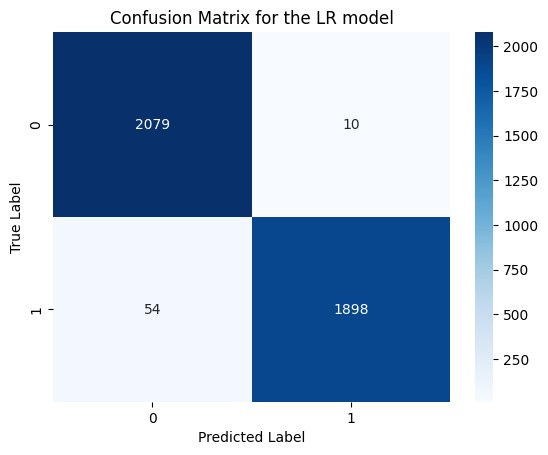

Accuracy of the model: 0.9842


In [93]:
scaler=StandardScaler(with_mean=False)

X_train_n=scaler.fit_transform(X_train)
X_test_n=scaler.transform(X_test)

clf_LR = LogisticRegression(random_state=42,C=5,solver='liblinear',penalty='l2')
clf_LR.fit(X_train_n, y_train)

predictions_LR = clf_LR.predict(X_test_n)


#Print classification report
print("Classification Report for the optimal LR model:")
print(classification_report(y_test, predictions_LR))

accuracy_LR = accuracy_score(y_test, predictions_LR)
print(f'Accuracy of the model: {accuracy_LR:.4f}')

#Plot confusion matrix
conf_matrix_LR = confusion_matrix(y_test, predictions_LR)
sns.heatmap(conf_matrix_LR, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for the LR model')
plt.savefig('LR matrix')
plt.show()


accuracy_LR = accuracy_score(y_test, predictions_LR)
print(f'Accuracy of the model: {accuracy_LR:.4f}')

*

* (Left empty in purpose)

*

## 2.2 SVM

In [56]:
from sklearn.svm import SVC

In [57]:
clf_SVC = SVC()
clf_SVC.fit(X_train_n, y_train)

predictions_SVC = clf_SVC.predict(X_test_n)

accuracy_SVC = accuracy_score(y_test, predictions_SVC)
print(f'Accuracy of the SVM model: {accuracy_SVC:.4f}')

Accuracy of the SVM model: 0.9490


### 2.2.1 Grid Search (Hyperparameter tuning)

In [58]:
%%time
param_grid = {'C': [1,10,15,20], 'kernel': ['linear','poly','rbf','sigmoid']}

svm = SVC()

grid_search_SVC = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs = 1, verbose=3)

grid_search_SVC.fit(X_train_n, y_train)

print(f'Best Score: {grid_search_SVC.best_score_:.4f}')
print(f'Best Parameters: {grid_search_SVC.best_params_}')

best_svm = grid_search_SVC.best_estimator_

predictions_SVC = best_svm.predict(X_test_n)
accuracy_SVC = accuracy_score(y_test, predictions_SVC)
print(f'Accuracy of the SVM model: {accuracy_SVC:.4f}')

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ................C=1, kernel=linear;, score=0.984 total time=   2.1s
[CV 2/5] END ................C=1, kernel=linear;, score=0.985 total time=   2.1s
[CV 3/5] END ................C=1, kernel=linear;, score=0.985 total time=   2.2s
[CV 4/5] END ................C=1, kernel=linear;, score=0.985 total time=   2.3s
[CV 5/5] END ................C=1, kernel=linear;, score=0.987 total time=   2.2s
[CV 1/5] END ..................C=1, kernel=poly;, score=0.915 total time=   9.4s
[CV 2/5] END ..................C=1, kernel=poly;, score=0.919 total time=   9.1s
[CV 3/5] END ..................C=1, kernel=poly;, score=0.920 total time=   9.5s
[CV 4/5] END ..................C=1, kernel=poly;, score=0.946 total time=   6.7s
[CV 5/5] END ..................C=1, kernel=poly;, score=0.921 total time=   9.3s
[CV 1/5] END ...................C=1, kernel=rbf;, score=0.943 total time=   6.6s
[CV 2/5] END ...................C=1, kernel=rbf;

### 2.2.2 Confusion Matrix

Classification Report for the optimal SVM model:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2089
           1       1.00      0.98      0.99      1952

    accuracy                           0.99      4041
   macro avg       0.99      0.99      0.99      4041
weighted avg       0.99      0.99      0.99      4041

Accuracy of the SVM model: 0.9884


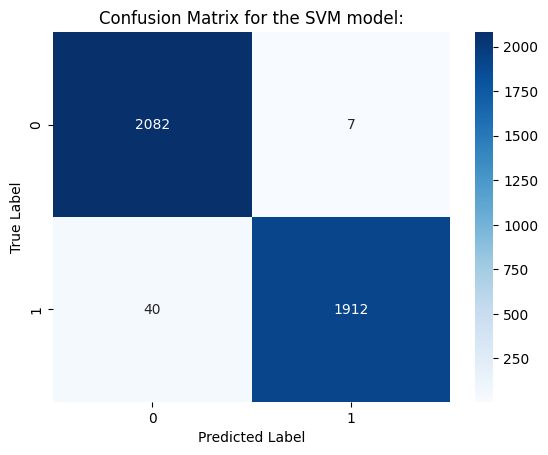

In [75]:
clf_SVC_f= SVC(C=20,kernel="linear")
clf_SVC_f.fit(X_train_n, y_train)

predictions_SVC_f = clf_SVC_f.predict(X_test_n)


#Print classification report
print("Classification Report for the optimal SVM model:")
print(classification_report(y_test, predictions_SVC_f))

accuracy_SVC_f = accuracy_score(y_test, predictions_SVC_f)
print(f'Accuracy of the SVM model: {accuracy_SVC_f:.4f}')

#Plot confusion matrix
conf_matrix_SVC_f = confusion_matrix(y_test, predictions_SVC_f)
sns.heatmap(conf_matrix_SVC_f, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for the SVM model:')
plt.savefig('SVM')
plt.show()




## 2.3 RANDOM FOREST

In [60]:
from sklearn.ensemble import RandomForestClassifier

### 2.3.1 Grid Search (Hyperparameter tuning)

In [74]:
%%time
rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42)

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator = rf_classifier, param_grid=param_grid, cv=5, verbose = 3, n_jobs = 1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train, y_train)
y_pred_rf= best_rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f'Best Score: {grid_search.best_score_:.4f}')
print(f'Best Parameters: {grid_search.best_params_}')

print(f'Accuracy of the RF model: {accuracy_rf:.4f}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=10;, score=0.968 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=10;, score=0.974 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=10;, score=0.977 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=10;, score=0.966 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=10;, score=0.971 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=50;, score=0.983 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=50;, score=0.986 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=50;, score=0.986 total time=   0.4s
[CV 4/5] END criterion=gini, max_d

### 2.3.2 Confusion Matrix

Classification Report for the optimal RF model:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2089
           1       0.99      0.98      0.99      1952

    accuracy                           0.99      4041
   macro avg       0.99      0.99      0.99      4041
weighted avg       0.99      0.99      0.99      4041

Accuracy of the RF model: 0.9881


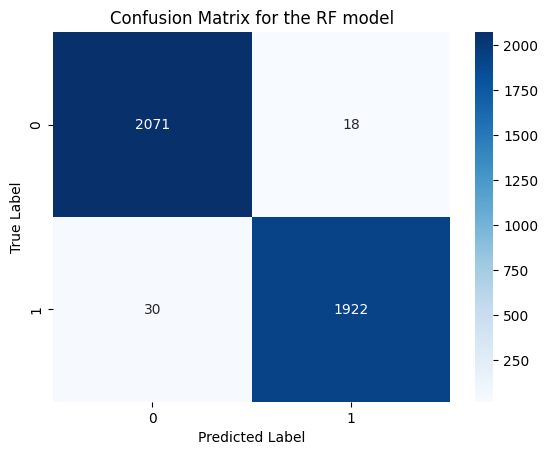

In [76]:
print("Classification Report for the optimal RF model:")
print(classification_report(y_test, y_pred_rf))

print(f'Accuracy of the RF model: {accuracy_rf:.4f}')

conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for the RF model')
plt.savefig('RF conf')
plt.show()

